<a href="https://colab.research.google.com/github/MohammadNuramin/Deep-Learning/blob/main/DL_TP1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UJM - Master DSC/MLDM - Deep Learning - TP1a

## Help and documentation on Keras

From the page of Keras: <https://keras.io>
In particular you will have access to some guides: <https://keras.io/guides/>
And the API where you can look for specific functions or functionalities <https://keras.io/api/>



### Part 1

As a cold start, we begin by considering some generated data

First we take the packages for displaying elements and generating data, we will use sklearn

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
# fix random seed for reproducibility
seed = 7

In [ ]:
centers = [(0, -5), (0, 5), (5, 0)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=1.5, centers=centers)

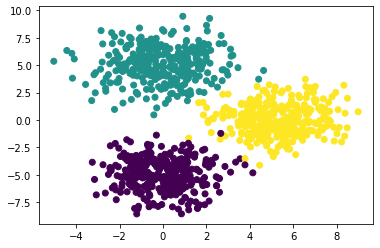

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [ ]:
X[:10]

array([[ 4.84055047,  1.33537933],
       [ 1.0665029 , -6.08918778],
       [-2.64314554,  2.89394945],
       [ 5.44697872, -0.58523801],
       [ 7.28853924,  1.19899092],
       [ 1.09376016, -3.59467488],
       [ 2.72280518,  4.57734854],
       [-1.89476103, -6.05933537],
       [ 1.25133745,  2.67898116],
       [ 0.28003268, -4.75068984]])

In [ ]:
y[:10]

array([2, 0, 1, 2, 2, 0, 1, 0, 1, 0])

**Keras modules**

We now import keras modules for defining a MLP:
Sequential: type of Network, Dense: type of layers, Dropout allowing regularization, to_categorial for dealing with labels

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

**Note** We need to convert the labels to categorical data (one-hot-vector) to be used for cross entropy loss with Keras, we have 3 classes here

In [ ]:
Y = to_categorical(y, 3)

**Note** We prepare the data with a split into train/test with ration 2:1 ussing Sklearn train_test_split, random seed is initialized to 1

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

**Note** We create a model with 3 layers, activations are ReLu and we add dropout regularizations. Last activation is softmax

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

**Note** we now define the loss (crossentropy), the optimizer (adam) and the performance metrics, and we print the model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

**Note** we now launch training by fixing the number of epochs and the batch size

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

**Note** we now display accuracy on train and test

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9909
training_accuracy: 0.9970149397850037
testing_accuracy: 0.9909090995788574


**Note** if you fit again the model may continue to train

If you want to display the result every 10 epochs, you could use the following kind of loops
```
for i in range(5):
    model.fit(X_train, y_train, epochs=10, batch_size=64,verbose=0)
    _, train_acc = model.evaluate(X_train, y_train, batch_size=64)
    _, test_acc = model.evaluate(X_test, y_test, batch_size=64)
    print('training_accuracy, epoch number ', i*10+ 10,' : ', train_acc)
    print('testing_accuracy, epoch number ', i*10+ 10,' : ', test_acc,'\n')
```

**Question**
Use this procedure to compare the behavior of different optimizers available on Keras, check this page
<https://keras.io/api/optimizers/>
Try to compare the behavior of: SGD, RMSprop, Adam, Adadelta, Adagrad
Have a look to the available parameters

Optimizer : Adadelta

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
print(model.summary())  

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.0426 - accuracy: 0.9909
training_accuracy: 0.9970149397850037
testing_accuracy: 0.9909090995788574


Optimizer : RMSprop

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
print(model.summary())  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9909
training_accuracy: 0.9970149397850037
testing_accuracy: 0.9909090995788574


Optimizer: Adadelta

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])
print(model.summary()) 

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9909
training_accuracy: 0.9970149397850037
testing_accuracy: 0.9909090995788574


**Question** Using your favorite optimizer, try to change the architecture by simplifying or complexifying it, how the performance evolves?
Objective: Learn to add normalization layers, dropout, L1/L2 regularization.

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
from keras.optimizers import SGD,RMSprop, Adam, Adadelta, Adagrad

In [ ]:
opt = Adam(lr=0.1, momentum=0.9, decay=0.0)

TypeError: ignored

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 18        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.6394
training_accuracy: 0.6776119470596313
testing_accuracy: 0.6393939256668091
